<a href="https://colab.research.google.com/github/youcine/Diamond-Price-Prediction-with-Machine-Learning/blob/main/Correlation_features_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlation check**

**Original data**

In [ ]:
df_cm = df.select_dtypes(['float64', 'int64']).corr()
# correlation_matrix = df.corr(numeric_only=True)
df_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.921911
size     0.897903
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

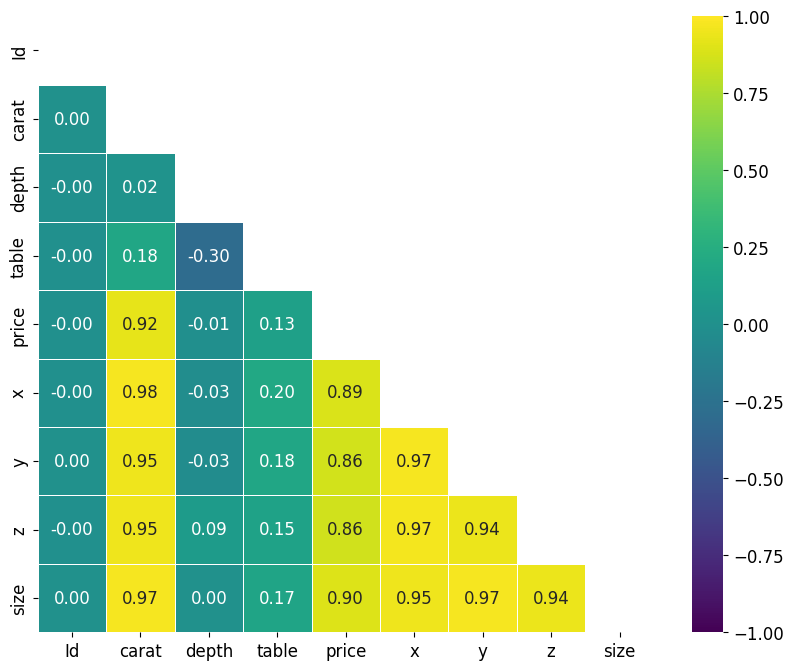

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

**Cleaned data without outliers (Z-score method)**

In [ ]:
newdf_cm = newdf.select_dtypes(['float64', 'int64']).corr()
newdf_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.923073
y        0.885971
x        0.884542
z        0.880871
table    0.135105
Id      -0.006359
depth   -0.017288
Name: price, dtype: float64

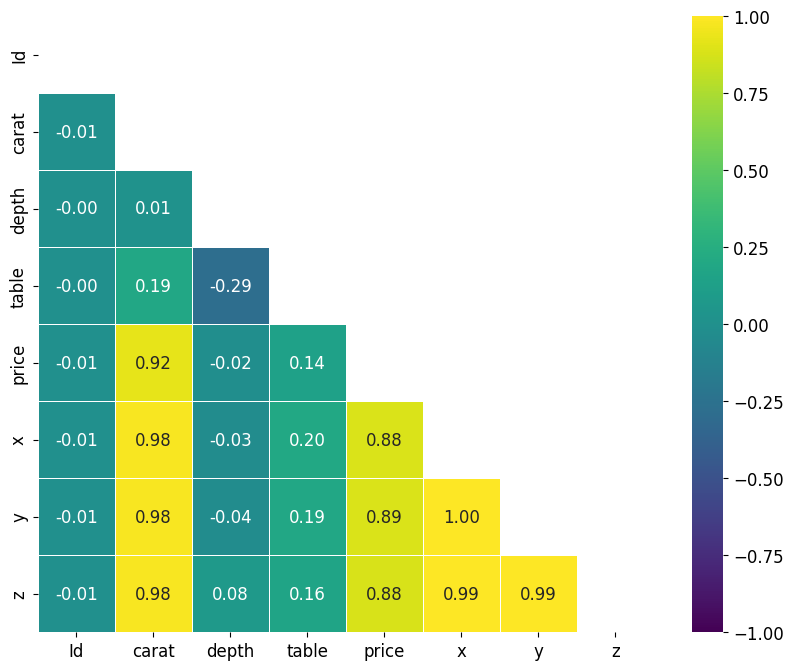

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(newdf_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

**Cleaned data without outliers (method 2)**

In [ ]:
df_r_cm = df_r.select_dtypes(['float64', 'int64']).corr()
df_r_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.929284
y        0.911673
x        0.910817
z        0.905757
table    0.148538
depth    0.030980
Id      -0.002747
Name: price, dtype: float64

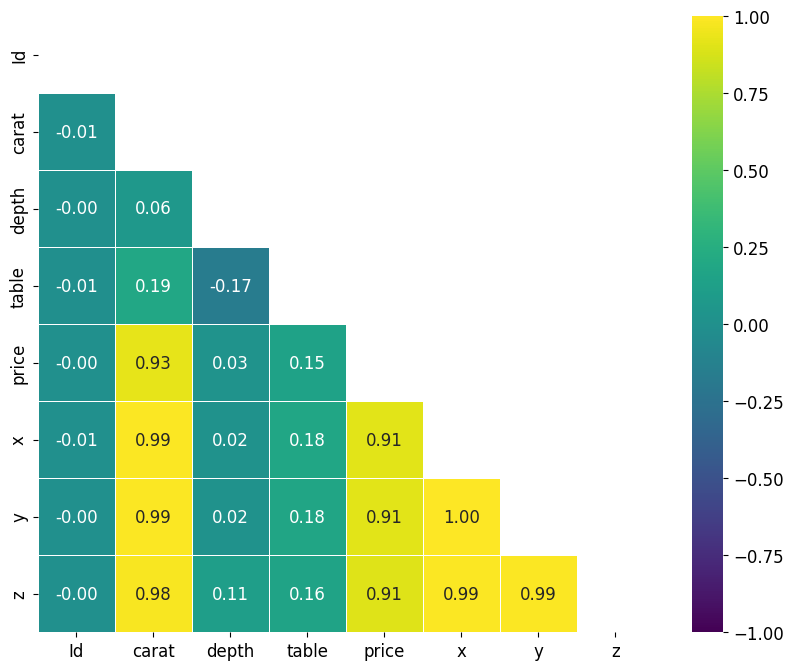

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df_r_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

# **Feature Engineering**

**Adding size column and removing x,y,z columns**

In [ ]:
df['size']=df['x']*df['y']*df['z']

In [ ]:
newdf['size']=newdf['x']*newdf['y']*newdf['z']
df_r['size']=df_r['x']*df_r['y']*df_r['z']

NameError: name 'newdf' is not defined

In [ ]:
# checking the correlation between the price column and the rest features,
# the correlation between the size and the price is higher than the other correlations.
newdf_cm = newdf.select_dtypes(['float64', 'int64']).corr()
newdf_cm['price'].sort_values(ascending=False)

price         1.000000
size          0.924465
carat         0.923073
y             0.885971
x             0.884542
z             0.880871
table         0.135105
Unnamed: 0   -0.006359
Id           -0.006359
depth        -0.017288
Name: price, dtype: float64

In [ ]:
df_r_cm = df_r.select_dtypes(['float64', 'int64']).corr()
df_r_cm['price'].sort_values(ascending=False)

price         1.000000
size          0.929699
carat         0.929284
y             0.911673
x             0.910817
z             0.905757
table         0.148538
depth         0.030980
Unnamed: 0   -0.002747
Id           -0.002747
Name: price, dtype: float64

In [ ]:
# removing x,y,z columns
newdf.drop([ 'x' , 'y' ,'z'], axis=1, inplace=True)
df_r.drop([ 'x' , 'y' ,'z'], axis=1, inplace=True)

**Splitting the data into train and test**

In [ ]:
# Split original data
X = df.drop(['price', 'Id'], axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split data 1
X1 = newdf.drop(['price', 'Id'], axis=1)
y1 = newdf['price']
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# Split data 2
X2 = df_r.drop(['price', 'Id'], axis=1)
y2 = df_r['price']
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

**Feature transformation**

In [ ]:
df_clean.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200


In [ ]:
# Split data 2
X3 = df_clean.drop(['price', 'Id'], axis=1)
y3 = df_clean['price']
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
# original data
lr_cut = LabelEncoder()
lr_clarity = LabelEncoder()
x_train[['cut']] = x_train[['cut']].apply(lr_cut.fit_transform)
x_train[['clarity']] = x_train[['clarity']].apply(lr_clarity.fit_transform)
x_test[['cut']] = x_test[['cut']].apply(lr_cut.transform)
x_test[['clarity']] = x_test[['clarity']].apply(lr_clarity.transform)

data_num = x_train.select_dtypes(np.number).columns
num_attribs = list(data_num)
cat_attribs = ['color']

full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
  ("cat_non_ord",OneHotEncoder(), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(x_train)
X_test_prepared = full_pipeline.transform(x_test)

In [ ]:
# data 1
lr1_cut = LabelEncoder()
lr1_clarity = LabelEncoder()
x1_train[['cut']] = x1_train[['cut']].apply(lr1_cut.fit_transform)
x1_train[['clarity']] = x1_train[['clarity']].apply(lr1_clarity.fit_transform)
x1_test[['cut']] = x1_test[['cut']].apply(lr1_cut.transform)
x1_test[['clarity']] = x1_test[['clarity']].apply(lr1_clarity.transform)

data_num = x1_train.select_dtypes(np.number).columns
num_attribs = list(data_num)
cat_attribs = ['color']

full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
  ("cat_non_ord",OneHotEncoder(), cat_attribs),
])

X1_train_prepared = full_pipeline.fit_transform(x1_train)
X1_test_prepared = full_pipeline.transform(x1_test)

In [ ]:
# data 2
cat_ord_attribs = ['cut', 'clarity']
lr2 = LabelEncoder()
x2_train[cat_ord_attribs] = x2_train[cat_ord_attribs].apply(lr2.fit_transform)
x2_test[cat_ord_attribs] = x2_test[cat_ord_attribs].apply(lr2.transform)

data_num = x2_train.select_dtypes(np.number).columns
num_attribs = list(data_num)
cat_attribs = ['color']

full_pipeline = ColumnTransformer([
  ("num", MinMaxScaler(), num_attribs),
  ("cat_non_ord",OneHotEncoder(), cat_attribs),
])

X2_train_prepared = full_pipeline.fit_transform(x2_train)
X2_test_prepared = full_pipeline.transform(x2_test)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories for each ordinal feature
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Create an OrdinalEncoder with these categories
ordinal_encoder = OrdinalEncoder(categories=[cut_categories, clarity_categories, color_categories])

# Fit and transform the ordinal features
x3_train[['cut', 'clarity', 'color']] = ordinal_encoder.fit_transform(x3_train[['cut', 'clarity', 'color']])
x3_test[['cut', 'clarity', 'color']] = ordinal_encoder.transform(x3_test[['cut', 'clarity', 'color']])

# Identify numeric attributes
data_num = x3_train.select_dtypes(np.number).columns
num_attribs = list(data_num)

full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
])

X_train_prepared = full_pipeline.fit_transform(x3_train)
X_test_prepared = full_pipeline.transform(x3_test)

print(X_train_prepared[:5])
print(X_test_prepared[:5])


[[-0.88443491  0.98078231  0.34580173 -0.02750175  0.46000977 -1.5549166
  -0.96587623 -1.01237089 -0.91275734 -0.88908751]
 [-1.03232348  0.0860158   0.93279561 -0.63364667 -1.7207748   0.68745922
  -1.17092344 -1.11932672 -1.26401372 -1.01369852]
 [-0.16611901 -0.80875071 -0.82818604 -0.63364667 -0.17312123 -0.65796627
   0.03261456  0.05718747  0.02860976 -0.14042097]
 [-1.05345041  0.98078231  1.5197895  -0.63364667 -0.52486068 -0.20949111
  -1.25115931 -1.28867346 -1.27806398 -1.05839414]
 [-0.90556185  0.98078231  0.93279561  0.57864317 -0.3841649  -0.65796627
  -0.97479132 -0.94997998 -0.96895836 -0.88988448]]
[[-1.20133898 -0.80875071  0.93279561  1.79093301 -0.31381701  1.13593438
  -1.58993296 -1.53823708 -1.54501883 -1.1916884 ]
 [-0.60978471  0.0860158   0.93279561 -1.23979159 -1.0172959  -0.65796627
  -0.45771574 -0.4865047  -0.56150096 -0.58541   ]
 [ 0.34092751  0.0860158  -1.41517992 -1.23979159 -0.31381701  1.13593438
   0.6388411   0.45827185  0.50631844  0.35692969]


In [ ]:
print(x3_train['cut'].unique())
print(x3_train['clarity'].unique())
print(x3_train['color'].unique())


[4. 3. 2. 0. 1.]
[3. 2. 4. 5. 6. 1. 0. 7.]
[4. 5. 2. 6. 3. 1. 0.]


In [ ]:
X_train_prepared[3][:]

array([-1.05345041,  0.98078231,  1.5197895 , -0.63364667, -0.52486068,
       -0.20949111, -1.25115931, -1.28867346, -1.27806398, -1.05839414])

In [ ]:
oh = OneHotEncoder()
oh.fit(x_train[['color']])
oh.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]

In [ ]:
df_col_names = ['carat', 'cut','clarity', 'depth', 'table','size', 'D', 'E', 'F', 'G', 'H', 'I', 'J' ]
X_train_prepared = pd.DataFrame(X_train_prepared, columns=df_col_names)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=df_col_names)

X1_train_prepared = pd.DataFrame(X1_train_prepared, columns=df_col_names)
X1_test_prepared = pd.DataFrame(X1_test_prepared, columns=df_col_names)

X_train_prepared.head()

,carat,cut,clarity,depth,table,size,D,E,F,G,H,I,J
0,1.582808,0.431553,0.098463,0.591302,0.687438,1.581266,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.509649,0.431553,-2.221692,0.312642,0.239182,0.466907,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.888411,0.431553,0.678501,0.033982,0.239182,0.925406,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.605595,-0.538094,-1.641653,0.591302,-0.657331,-0.598861,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.816019,-0.538094,-1.061615,0.242977,-1.553844,-0.803415,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#X1_train = X1_train_prepared
#X1_test = X1_test_prepared

X_train = X_train_prepared
X_test = X_test_prepared
y_train =y3_train
y_test= y3_test